<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

By: Sara Rostami & Keyhan Rayati

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Numpy

### Question1: mean and std of numbers between 10 and 1000.

In [6]:
nums = np.arange(10,1001)
mean_nums = np.mean(nums)
std_nums = np.std(nums)
print(f"mean: {mean_nums} , sd: {std_nums}")

mean: 505.0 , sd: 286.07691273501956


### Question2: nearest point to each random point.

source: https://jaykmody.com/blog/distance-matrices-with-numpy/

In [7]:
np.random.seed(2)
nums = np.random.rand(100,10)*100

In [8]:
x2 = np.sum(nums**2, axis=1)
y2 = np.sum(nums**2, axis=1)
xy = np.matmul(nums, nums.T)
x2 = x2.reshape(-1, 1)
dists0 = x2 - 2*xy + y2
np.fill_diagonal(dists0,np.max(dists0)*2)
np.apply_along_axis(np.argmin, 1, dists0)

array([60, 43,  0,  9, 31, 22, 92, 72, 60,  3, 31, 48, 65, 96, 16, 98, 73,
       20, 65, 26, 17, 17, 37, 17, 19, 56, 19, 77, 10, 44, 87, 10, 68, 98,
       89, 64, 93, 22, 79, 79, 48,  9, 44, 80, 79, 50, 59, 99, 23, 10, 45,
       78, 80, 78, 14, 82, 25, 55, 11, 83,  0, 85, 79, 66, 94, 12, 63, 19,
       49, 12, 39, 23,  7, 92, 40, 44, 90, 10, 65, 44, 43, 60, 55, 64, 52,
       79, 34, 56, 98, 34, 48, 45, 73, 36, 81, 80, 13, 44, 15, 44],
      dtype=int64)

### Question3: Histogram of distances.

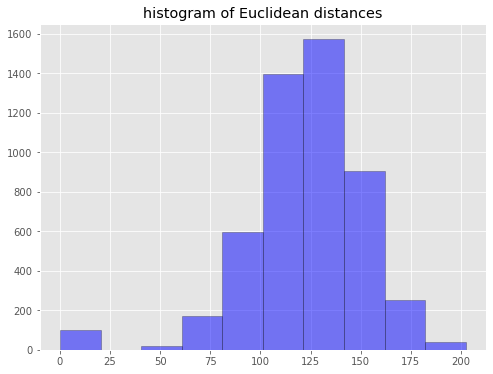

In [61]:
dists = np.sqrt(dists0)
np.fill_diagonal(dists,0)
plt.figure(figsize=(8,6))
plt.hist(dists[np.triu_indices(100, k = 0)],facecolor='blue', alpha=0.5,edgecolor = "black")
# plt.style.use('ggplot')
plt.title("histogram of Euclidean distances") 
plt.show()

### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/patents.csv')
df.head()
patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
temp = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    temp.append(
        np.array(s.split()[1:-1], dtype='float')[:16]
    )

patent_features = np.stack(temp)
patent_category = df['category']

#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

In [11]:
max_idx = np.argmax(np.linalg.norm(patent_features,axis=1)) #index = 10839
df.loc[max_idx,:] 

publication_number                                          CH-527846-A
title                                             penicillanylaldehydes
cpc_code                                                     C07D499/00
patent_embedding      [-1.58957148e-03  3.83572765e-02 -1.47625625e-...
category                                                              5
Name: 10839, dtype: object

#### Part 2: Find the two patents that are the farthest from eachother

In [12]:
x2 = np.sum(patent_features**2, axis=1)
y2 = np.sum(patent_features**2, axis=1)
xy = np.matmul(patent_features, patent_features.T)
x2 = x2.reshape(-1, 1)
dists1 = x2 - 2*xy + y2
dists1 = np.sqrt(dists1)
np.fill_diagonal(dists1,0)
p1 = np.argmax(dists1)%len(dists1[0]) - 1
p2 = np.argmax(dists1)//len(dists1[0]) - 1
print(f"patent indices: {p1} , {p2}")
df.loc[[p1,p2],:]

patent indices: 13361 , 17


,publication_number,title,cpc_code,patent_embedding,category
13361,US-2009014968-A1,method and device for center and clamp a workp...,B23B31/12,[ 1.8826999e-02 2.5477704e-02 -3.2558821e-02 ...,1
17,US-2017171537-A1,_NUMBER_d display method and device for execut...,G02B30/34,[-0.00500602 0.03042964 -0.04703296 0.021260...,7


#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

In [13]:
def patent_nn(i):
    dists = np.sqrt(np.sum(((patent_features - patent_features[i])**2),axis = 1))
    dists[i] = np.max(dists)
    min_idx = np.argmin(dists)
    print(f"patent index: {min_idx} , distance from patent{i}: {np.min(dists)}")
    print('-'*70)
    print(df.loc[min_idx,:])

In [14]:
#calling the function (example)
patent_nn(1)

patent index: 2147 , distance from patent1: 0.08533662762471762
----------------------------------------------------------------------
publication_number                                     US-2019247981-A1
title                                             grind or polish brush
cpc_code                                                     B24D13/145
patent_embedding      [-2.05173399e-02  5.65512925e-02 -5.10466211e-...
category                                                              6
Name: 2147, dtype: object


#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [15]:
def patent_nn_same_cat(i):
    dists = np.sqrt(np.sum(((patent_features - patent_features[i])**2),axis = 1))
    dists[i] = np.max(dists)
    min_idx = np.argmin(dists)
    if df.loc[min_idx,'category'] == df.loc[i,'category']:
        return True

nn_fuct = np.vectorize(patent_nn_same_cat)
same_cat_indices = nn_fuct(np.arange(len(patent_category)))
count = np.count_nonzero(same_cat_indices)
print(f"the number of patents that have a same category nearest neighbor: {count}")

the number of patents that have a same category nearest neighbor: 13000


#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

In [16]:
cat0_indices = np.where(patent_category == 0)[0]
cat1_indices = np.where(patent_category == 1)[0]
cat2_indices = np.where(patent_category == 2)[0]
cat3_indices = np.where(patent_category == 3)[0]
cat4_indices = np.where(patent_category == 4)[0]
cat5_indices = np.where(patent_category == 5)[0]
cat6_indices = np.where(patent_category == 6)[0]
cat7_indices = np.where(patent_category == 7)[0]


In [17]:
def dists_category(arr):
    x2 = np.sum(arr**2, axis=1)
    y2 = np.sum(arr**2, axis=1)
    xy = np.matmul(arr, arr.T)
    x2 = x2.reshape(-1, 1)
    dists1 = x2 - 2*xy + y2
    dists1 = np.sqrt(dists1)
    np.fill_diagonal(dists1,0)
    # return dists1
    m = dists1.shape[0]
    r,c = np.triu_indices(m,1)
    return dists1[r,c]

In [18]:
pairwise_dist_cat0 = dists_category(patent_features[cat0_indices])
pairwise_dist_cat1 = dists_category(patent_features[cat1_indices])
pairwise_dist_cat2 = dists_category(patent_features[cat2_indices])
pairwise_dist_cat3 = dists_category(patent_features[cat3_indices])
pairwise_dist_cat4 = dists_category(patent_features[cat4_indices])
pairwise_dist_cat5 = dists_category(patent_features[cat5_indices])
pairwise_dist_cat6 = dists_category(patent_features[cat6_indices])
pairwise_dist_cat7 = dists_category(patent_features[cat7_indices])

In [19]:
means = []
means.append(np.mean(pairwise_dist_cat0[np.logical_not(pd.isna(pairwise_dist_cat0))]))
means.append(np.mean(pairwise_dist_cat1[np.logical_not(pd.isna(pairwise_dist_cat1))]))
means.append(np.mean(pairwise_dist_cat2[np.logical_not(pd.isna(pairwise_dist_cat2))]))
means.append(np.mean(pairwise_dist_cat3[np.logical_not(pd.isna(pairwise_dist_cat3))]))
means.append(np.mean(pairwise_dist_cat4[np.logical_not(pd.isna(pairwise_dist_cat4))]))
means.append(np.mean(pairwise_dist_cat5[np.logical_not(pd.isna(pairwise_dist_cat5))]))
means.append(np.mean(pairwise_dist_cat6[np.logical_not(pd.isna(pairwise_dist_cat6))]))
means.append(np.mean(pairwise_dist_cat7[np.logical_not(pd.isna(pairwise_dist_cat7))]))
print(f"mean of pairwise distances in each category:\n{means}")

mean of pairwise distances in each category:
[0.13105575218871945, 0.1023939425625338, 0.14111790621794848, 0.1388845498332831, 0.13621684295281647, 0.13469712084300253, 0.10403006587544546, 0.13058359538210487]


In [20]:
sds = []
sds.append(np.std(pairwise_dist_cat0[np.logical_not(pd.isna(pairwise_dist_cat0))]))
sds.append(np.std(pairwise_dist_cat1[np.logical_not(pd.isna(pairwise_dist_cat1))]))
sds.append(np.std(pairwise_dist_cat2[np.logical_not(pd.isna(pairwise_dist_cat2))]))
sds.append(np.std(pairwise_dist_cat3[np.logical_not(pd.isna(pairwise_dist_cat3))]))
sds.append(np.std(pairwise_dist_cat4[np.logical_not(pd.isna(pairwise_dist_cat4))]))
sds.append(np.std(pairwise_dist_cat5[np.logical_not(pd.isna(pairwise_dist_cat5))]))
sds.append(np.std(pairwise_dist_cat6[np.logical_not(pd.isna(pairwise_dist_cat6))]))
sds.append(np.std(pairwise_dist_cat7[np.logical_not(pd.isna(pairwise_dist_cat7))]))
print(f"standard deviation of paiwise distances in each category:\n{sds}")


standard deviation of paiwise distances in each category:
[0.03962843965082826, 0.030502629553162228, 0.043798099929630435, 0.04463022702390595, 0.04010193238495966, 0.04227521613012989, 0.03176575682421008, 0.03844044754786177]


#### <font color='blue'>yes, standard deviation tells you how spread out the data is.</font>
#### <font color='blue'>standard deviation of the forth catgory (which is category number 3) is the highest, therefore we can conclude that the pairwise distances of category 3 is more scatterd than other categories. it's worth mentioning that std of all categories are really low, which means we are not dealing with that much of scatterd data overall.</font>

# Working with different Data Files

## .txt

### Part 1: store words in a list

In [21]:
rep_words = words = []
with open('data/zen_of_python.txt') as file:
        for line in file:       
            for word in line.split(): 
                rep_words.append(word)
                if word not in words:
                    words.append(word)
for w in words:
    print(w, end=', ')

The, Zen, of, Python,, by, Tim, Peters, Beautiful, is, better, than, ugly., Explicit, is, better, than, implicit., Simple, is, better, than, complex., Complex, is, better, than, complicated., Flat, is, better, than, nested., Sparse, is, better, than, dense., Readability, counts., Special, cases, aren't, special, enough, to, break, the, rules., Although, practicality, beats, purity., Errors, should, never, pass, silently., Unless, explicitly, silenced., In, the, face, of, ambiguity,, refuse, the, temptation, to, guess., There, should, be, one--, and, preferably, only, one, --obvious, way, to, do, it., Although, that, way, may, not, be, obvious, at, first, unless, you're, Dutch., Now, is, better, than, never., Although, never, is, often, better, than, *right*, now., If, the, implementation, is, hard, to, explain,, it's, a, bad, idea., If, the, implementation, is, easy, to, explain,, it, may, be, a, good, idea., Namespaces, are, one, honking, great, idea, --, let's, do, more, of, those!, 

### Part 2: Occurrence of each character

In [22]:
char_count = dict()
for w in rep_words:
    for c in w:
        if c not in char_count:
            char_count[c] = 0
        char_count[c] += 1
print(char_count)

{'T': 3, 'h': 32, 'e': 92, 'Z': 1, 'n': 41, 'o': 44, 'f': 11, 'P': 2, 'y': 17, 't': 77, ',': 6, 'b': 20, 'i': 51, 'm': 16, 'r': 35, 's': 46, 'B': 1, 'a': 52, 'u': 20, 'l': 34, 'g': 11, '.': 18, 'E': 2, 'x': 6, 'p': 20, 'c': 18, 'S': 3, 'C': 1, 'd': 17, 'F': 1, 'R': 1, "'": 4, 'k': 2, 'A': 3, 'v': 5, 'U': 1, 'I': 3, '-': 6, 'w': 5, 'D': 1, 'N': 2, '*': 2, '!': 1, '2': 2, '1': 3, '4': 2, '7': 1}


### Part 3: Occurrence of each word

In [23]:
word_count = dict()
for w in rep_words:
    word_count[w] = rep_words.count(w)
    # print(f'"{w}" appears {rep_words.count(w)} time(s)')
print(word_count)

{'The': 1, 'Zen': 1, 'of': 3, 'Python,': 1, 'by': 1, 'Tim': 1, 'Peters': 1, 'Beautiful': 1, 'is': 10, 'better': 8, 'than': 8, 'ugly.': 1, 'Explicit': 1, 'implicit.': 1, 'Simple': 1, 'complex.': 1, 'Complex': 1, 'complicated.': 1, 'Flat': 1, 'nested.': 1, 'Sparse': 1, 'dense.': 1, 'Readability': 1, 'counts.': 1, 'Special': 1, 'cases': 1, "aren't": 1, 'special': 1, 'enough': 1, 'to': 5, 'break': 1, 'the': 5, 'rules.': 1, 'Although': 3, 'practicality': 1, 'beats': 1, 'purity.': 1, 'Errors': 1, 'should': 2, 'never': 2, 'pass': 1, 'silently.': 1, 'Unless': 1, 'explicitly': 1, 'silenced.': 1, 'In': 1, 'face': 1, 'ambiguity,': 1, 'refuse': 1, 'temptation': 1, 'guess.': 1, 'There': 1, 'be': 3, 'one--': 1, 'and': 1, 'preferably': 1, 'only': 1, 'one': 2, '--obvious': 1, 'way': 2, 'do': 2, 'it.': 1, 'that': 1, 'may': 2, 'not': 1, 'obvious': 1, 'at': 1, 'first': 1, 'unless': 1, "you're": 1, 'Dutch.': 1, 'Now': 1, 'never.': 1, 'often': 1, '*right*': 1, 'now.': 1, 'If': 2, 'implementation': 2, 'hard

### Part 4: Define a function for saving stats at the end of `.txt` file

In [24]:
def save_stats(file_name):
    if not file_name.endswith('.txt'):
        return False
    word_cnt = char_cnt = 0
    with open(file_name ,'r+') as file:
        lines = file.readlines()
        for line in lines:       
            for word in line.split():
                word_cnt += 1
                for c in word:
                    char_cnt += 1
        file.seek(0,2)
        file.write(f"\n{len(lines)} lines, {word_cnt} words, {char_cnt} characters")
        print("lines:", len(lines), "words:", word_cnt, "characters:", char_cnt)

### Part 5: Apply your defined function on 'zen_of_python.txt`

In [54]:
save_stats('data/zen_of_python.txt')

lines: 21 words: 144 characters: 712


## csv

### Part 1: number of features and data points

In [26]:
df_patents = pd.read_csv('data/patents.csv')
print(f"number of data points:{len(df_patents)}, number of features:{len(df_patents.columns)}")

number of data points:15689, number of features:5


### Part 2: Name of Features

In [27]:
for c in df_patents.columns:
    print(c,end=', ')

publication_number, title, cpc_code, patent_embedding, category, 

### Part 3: Print Stats of Dataframe

In [28]:
patent_embd_numbers = []
for i in df_patents['patent_embedding']:
    i = i[1:-1]
    i = i.split()
    for j in i:
        patent_embd_numbers.append(float(j))

mean = np.mean(patent_embd_numbers)
std = np.std(patent_embd_numbers)
median = np.median(patent_embd_numbers)
qurtile1 = np.percentile(patent_embd_numbers, 25)
qurtile3 = np.percentile(patent_embd_numbers, 75)
min = np.min(patent_embd_numbers)
max = np.max(patent_embd_numbers)

print(f'mean = {mean}, std = {std}\nmedian = {median}, qurtile1 = {qurtile1}, qurtile3 = {qurtile3}\nmin = {min}, max = {max}')


mean = -0.0004193861210838408, std = 0.03687068035964856
median = -0.0008529779445, qurtile1 = -0.024514130624999998, qurtile3 = 0.02285189
min = -0.255971402, max = 0.2399454


### Part 4: print rows.

In [29]:
# 5 first rows
df_patents.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [30]:
# 5 last rows
df_patents.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [31]:
# 5 random row
df_patents.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
3636,DK-1313769-T3,antibody to human il _NUMBER_beta,C07K16/245,[-2.12672241e-02 -3.61485942e-03 -3.73682380e-...,5
648,AT-264523-T,method for produce a bio informatics database,H04M1/006,[ 0.00942981 0.02925444 -0.03199623 0.019581...,1
14524,US-2005277813-A1,brain state recognition system,A61B5/165,[-4.01872210e-04 -3.21274325e-02 -6.33502230e-...,5
6195,EP-1020434-A4,_NUMBER_ amidinoaniline derivative activate bl...,C07D233/64,[-0.0129022 0.0329337 -0.05979196 0.022958...,5
10120,EP-3244171-A1,measure device measure method and program,G01F1/66,[ 4.70994134e-03 3.08295898e-02 -3.89576480e-...,1


### Part 5: datatype of columns

In [32]:
df_patents.dtypes

publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object

### Part 6: use iloc and loc to select rows

#### difference between `loc` & `iloc` : <font color='blue'>The `loc()` function is label based data selecting method which means that we have to pass the name of the row or column which we want to select. This method includes the last element of the range passed in it, unlike iloc(). loc() can accept the boolean data unlike iloc().</font>
#### <font color='blue'>The `iloc()` function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column. This method does not include the last element of the range passed in it unlike loc(). iloc() does not accept the boolean data unlike loc().</font>

#### source: https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

In [33]:
# loc
df_patents.loc[1024:2048,:]

,publication_number,title,cpc_code,patent_embedding,category
1024,NL-2001963-C,device for purple coupling of rotatable axle o...,E06B9/50,[-1.22940196e-02 7.08151422e-03 3.84634943e-...,0
1025,US-2011302943-A1,heat pump system,F25B7/00,[ 0.00867311 0.04330906 -0.02139042 0.077371...,3
1026,US-9212450-B2,condensation dryer comprise a heat pump and me...,D06F58/20,[ 0.00031985 0.03251797 -0.05115911 0.063202...,1
1027,AU-2772677-A,animal _NUMBER_ plead ingredient,A23C11/065,[-1.34595903e-02 -2.34337710e-03 -3.06008086e-...,5
1028,AU-2785677-A,electrostatic dust precipitator,B03C3/40,[-1.18280798e-02 -3.81371230e-02 -1.94871891e-...,5
...,...,...,...,...,...
2044,WO-2008057240-A2,crystalline anti htnfalpha antibody,C07K16/241,[-2.86554657e-02 -8.49140435e-03 -7.47670010e-...,5
2045,US-2016266985-A1,method information processing apparatus and co...,G06F11/184,[ 0.01008777 0.014576 -0.00805853 0.040940...,4
2046,US-2054565-A,pork rind bait and method of prepare the same,A01K97/045,[-0.00287611 -0.01111656 -0.03714307 0.045409...,6
2047,US-2238673-A,process for the treatment of titanium contain ...,C22B3/06,[-0.01135918 -0.01864508 -0.03673615 0.045738...,6


In [34]:
# iloc
df_patents.iloc[1024:2049]

,publication_number,title,cpc_code,patent_embedding,category
1024,NL-2001963-C,device for purple coupling of rotatable axle o...,E06B9/50,[-1.22940196e-02 7.08151422e-03 3.84634943e-...,0
1025,US-2011302943-A1,heat pump system,F25B7/00,[ 0.00867311 0.04330906 -0.02139042 0.077371...,3
1026,US-9212450-B2,condensation dryer comprise a heat pump and me...,D06F58/20,[ 0.00031985 0.03251797 -0.05115911 0.063202...,1
1027,AU-2772677-A,animal _NUMBER_ plead ingredient,A23C11/065,[-1.34595903e-02 -2.34337710e-03 -3.06008086e-...,5
1028,AU-2785677-A,electrostatic dust precipitator,B03C3/40,[-1.18280798e-02 -3.81371230e-02 -1.94871891e-...,5
...,...,...,...,...,...
2044,WO-2008057240-A2,crystalline anti htnfalpha antibody,C07K16/241,[-2.86554657e-02 -8.49140435e-03 -7.47670010e-...,5
2045,US-2016266985-A1,method information processing apparatus and co...,G06F11/184,[ 0.01008777 0.014576 -0.00805853 0.040940...,4
2046,US-2054565-A,pork rind bait and method of prepare the same,A01K97/045,[-0.00287611 -0.01111656 -0.03714307 0.045409...,6
2047,US-2238673-A,process for the treatment of titanium contain ...,C22B3/06,[-0.01135918 -0.01864508 -0.03673615 0.045738...,6


### Part 7: Check Dataframe for NaN values

In [35]:
df_patents.isna().values.any()

False

### Part 8: Check Dataframe for duplicates

In [36]:
if df_patents.duplicated().any():
    display(df_patents[df_patents.duplicated()])

,publication_number,title,cpc_code,patent_embedding,category
1739,AU-2011202417-A1,a wall form in soil the wall include a hollow ...,E02D5/18,[ 3.92072555e-03 3.35453786e-02 -2.88293511e-...,1
5696,EP-3096560-A4,method and user equipment for block network ac...,H04W48/06,[-3.0044878e-02 -4.4037402e-05 -2.3655588e-02 ...,6
6496,US-2018076003-A1,method and apparatus for a porous electrospray...,H01J37/08,[ 0.02056626 0.04025198 -0.04704187 0.061253...,1
6962,US-2018328001-A1,boom assembly for a trencher,E02F5/14,[ 1.52878952e-03 3.42151672e-02 -4.17193323e-...,1
9408,JP-5702147-B2,electroactive material,H01L51/0035,[ 0.01078738 -0.01581865 -0.01463019 0.023458...,2
9980,JP-6373410-B2,end of life determination and prediction for i...,A61N1/36128,[-3.00560612e-03 5.31513337e-03 -1.25307012e-...,6
11142,AU-2012324531-A1,biomarkers useful for detection of type grade ...,C12Q1/6886,[ 0.01898381 0.01144431 -0.04808485 0.079074...,1
13850,US-2018042871-A1,bicyclic analgesic compound,A61K31/16,[ 4.39326465e-02 -1.77983195e-02 -8.26886818e-...,2
14823,HK-1225899-A1,apparatus system and method of secure communic...,H04W12/04,[-0.00121724 -0.00263928 0.0009811 0.056798...,6


### Part 9: Use `Lambda` Function for calculating word counts

In [37]:
df_patents['title_length'] = df_patents['title'].apply(lambda x: len(x.split()))
df_patents

,publication_number,title,cpc_code,patent_embedding,category,title_length
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1,6
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6,2
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0,4
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1,12
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0,2
...,...,...,...,...,...,...
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1,17
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5,13
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0,7
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6,12


### Part 10: Plot Histogram of Word counts

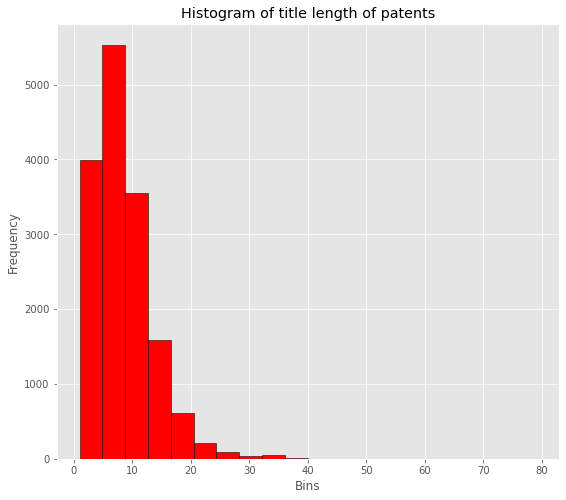

In [60]:
plt.figure(figsize=(9,8))
plt.title('Histogram of title length of patents')
plt.xlabel('Bins')
plt.ylabel('Frequency')
df_patents['title_length'].hist(bins = 20,color='red',edgecolor = "black");

## Log

##### source: https://github.com/feststelltaste/software-analytics/blob/master/notebooks/Reading%20a%20Git%20log%20file%20output%20with%20Pandas.ipynb

In [39]:
commits = pd.read_csv("data/git_log.log", sep="\u0012", header=None,names=['raw'])

### Part 1: Number of Total Commits

In [40]:
cnt = len(commits[commits['raw'].str.startswith("commit")])
print(f"total number of commits: {cnt}")

total number of commits: 536


### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

In [41]:
developers = commits[commits['raw'].str.startswith("Author")].copy()
developers[["developer", "email"]] = developers["raw"].str.split("<", expand=True)
dates = commits[commits['raw'].str.startswith("Date")]
dates.rename(columns = {'raw':'date'}, inplace = True)
dates = dates.reset_index(drop=True)
developers.drop('raw', inplace=True, axis=1)
developers['developer'] = developers['developer'].str.strip('Author: ')
developers['email'] = developers['email'].str.strip('>')
developers = developers.reset_index(drop=True)
developers['date']= dates['date'].str.strip('Date: ')
developers['commit_count'] =  developers.groupby('developer')['developer'].transform('count')
developers.drop_duplicates(subset =['developer'],keep='first',inplace=True)
developers = developers.reset_index(drop=True)
display(developers)

,developer,email,date,commit_count
0,Markus Harre,feststelltaste@googlemail.com,Tue Mar 5 22:32:20 2019 +0100,27
1,Markus,feststelltaste@users.noreply.github.com,Mon Mar 5 22:25:12 2018 +0100,4
2,JavaOnAutobahn,JavaOnAutobahn@users.noreply.github.com,Fri Feb 9 13:58:15 2018 +0100,5
3,Dirk Mahle,dirk.mahler@buschmais.com,Tue Oct 24 16:48:23 2017 +0200,59
4,dmahle,dirk.mahler@globalfoundries.com,Mon Feb 27 17:48:02 2017 +0100,2
5,feststelltaste,feststelltaste@googlemail.com,Wed Feb 22 23:00:42 2017 +0100,2
6,Oliver B. Fische,o.b.fischer@swe-blog.net,Thu Sep 15 23:27:55 2016 +0200,2
7,ntoine Rey,antoine.rey@gmail.com,Fri Aug 19 18:54:56 2016 +0200,64
8,ndrejGajdos,Andrej1,Thu Jul 28 13:50:07 2016 +0200,1
9,Mike Eltsufin,meltsufin@google.com,Fri Jul 22 11:31:12 2016 -0400,1


### Part 3: Developers with Maximum and Minimum Commit count

In [42]:
min_developers = developers.loc[developers['commit_count']==developers['commit_count'].min(),'developer']
max_developers = developers.loc[developers['commit_count']==developers['commit_count'].max(),'developer']

In [43]:
print(f"developer(s) with minimum number of commits:\n{list(min_developers)}")
print(f"developer(s) with maximum number of commits:\n{list(max_developers)}")

developer(s) with minimum number of commits:
['ndrejGajdos', 'Mike Eltsufin', 'Dapeng', 'ili', 'Faisal Hameed', 'XIAO XI LIU', 'lukasz-szewc', 'kadinyazilimci', 'patrickcrocke', 'inks', 'IHABRITANE', 'Colin B', 'srenkens', 'Vlad Selpukhin', 'mklose', 'Craig Dennis', 'Bram Luyten', 'boly38', 'TejasM', 'Chris Beams', 'Thomas Risberg']
developer(s) with maximum number of commits:
['Mic']


## Json

### Part 1: Create Dataframe from Json files

In [62]:
import json
import os

path = os.listdir("data/Videos/")
json_df = pd.DataFrame(columns=['title', 'lang' , 'record_date' , 'url', 'description' , 'category' , 'tags' , 'speakers' , 'duration'])


for i in path:
    with open(f'data/Videos/{i}', 'r') as fcc_file:
        fcc_data = json.load(fcc_file)
    title = lang = record_date = url = description = category = tags = speakers = duration = np.nan
    if 'title' in fcc_data:
        title = fcc_data['title']
    if 'language' in fcc_data:
        lang = fcc_data['language']
    if 'recorded' in fcc_data: 
        record_date = fcc_data['recorded']
    if 'videos' in fcc_data:
        url = fcc_data['videos'][0]['url']
    if 'description' in fcc_data:
        description = fcc_data['description']
    if 'category' in fcc_data:
        category = fcc_data["category"]
    if 'tags' in fcc_data:
        tags = fcc_data['tags']
    if 'speakers' in fcc_data:
        speakers = fcc_data['speakers']
    if 'duration' in fcc_data:
        duration = fcc_data['duration']

    json_df.loc[len(json_df)] = [ title , lang , record_date , url , description , category , tags , speakers , duration ]

json_df.head(5)


,title,lang,record_date,url,description,category,tags,speakers,duration
0,3D Print Anything with the Blender API,eng,2015-04-11,https://www.youtube.com/watch?v=ikcHP0Hd8Kc,,PyCon US 2015,[],[Jenny Cheng],None
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,https://www.youtube.com/watch?v=ePaga05gisk,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],None
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,https://archive.org/details/pyvideo_3371___A_l...,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,https://archive.org/details/pyvideo_3378___A_T...,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500
4,A Visual Guide To Pandas,eng,2013-12-12,https://archive.org/details/pyvideo_2551___A_V...,,ChiPy,[],[Jason Wirth],30


### Part 2: Handle Missing Values

In [63]:
json_df.isna().sum(axis=0)

title            0
lang             0
record_date      0
url              0
description      0
category        35
tags             5
speakers         0
duration       176
dtype: int64

In [64]:
# handle misiing values of the "category" column & "tags" by replacing them "Unknown" and ""
json_df['category'] = np.where(json_df['category'].isna(),"Unknown",json_df['category'])
json_df['tags'] = np.where(json_df['tags'].isna(),[""],json_df['tags'])

In [65]:
# fill the missing values of the "duration" column with mean of duration
json_df['duration'] = json_df['duration'].fillna(json_df['duration'].mean())
json_df

,title,lang,record_date,url,description,category,tags,speakers,duration
0,3D Print Anything with the Blender API,eng,2015-04-11,https://www.youtube.com/watch?v=ikcHP0Hd8Kc,,PyCon US 2015,[],[Jenny Cheng],1479.485294
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,https://www.youtube.com/watch?v=ePaga05gisk,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],1479.485294
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,https://archive.org/details/pyvideo_3371___A_l...,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.000000
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,https://archive.org/details/pyvideo_3378___A_T...,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.000000
4,A Visual Guide To Pandas,eng,2013-12-12,https://archive.org/details/pyvideo_2551___A_V...,,ChiPy,[],[Jason Wirth],30.000000
...,...,...,...,...,...,...,...,...,...
239,"Who saved The Onion, from being hacked by ""Syr...",eng,2013-05-09,http://s3.us.archive.org/ndvchipy/Who_saved_Th...,,ChiPy,[],[Sean Bloomfield],5.000000
240,Winning Machine Learning Competitions With Sci...,eng,2015-04-10,https://www.youtube.com/watch?v=gDbaCIE0mrA,This tutorial will offer an introduction machi...,PyCon US 2015,[],[Ben Hamner],1479.485294
241,"""Words, words, words"": Reading Shakespeare wit...",eng,2015-04-11,https://www.youtube.com/watch?v=EoWG0lavg9U,This talk will give an introduction to text an...,PyCon US 2015,[],[Adam Palay],1479.485294
242,Your Brain's API: Giving and Getting Technical...,eng,2015-04-12,https://www.youtube.com/watch?v=hY14Er6JX2s,Software engineers are never done learning sin...,PyCon US 2015,[],[Sasha Laundy],1479.485294


### Part 3: Title of videos published in 2016

In [66]:
result = json_df[json_df['record_date'].str[:4] == "2016" ]['title']
result

25                               ChiPy Python Mentorship
169    Python-based data science to understand knowle...
212         The wonder and the horror of the mock module
Name: title, dtype: object

### Part 4: Mean, Min, Max, Median of Duration for each Category

In [67]:
json_df['category_mean'] = json_df.groupby('category')['duration'].transform('mean')
json_df['category_min'] = json_df.groupby('category')['duration'].transform('min')
json_df['category_max'] = json_df.groupby('category')['duration'].transform('max')
json_df['category_median'] = json_df.groupby('category')['duration'].transform('median')
json_df

,title,lang,record_date,url,description,category,tags,speakers,duration,category_mean,category_min,category_max,category_median
0,3D Print Anything with the Blender API,eng,2015-04-11,https://www.youtube.com/watch?v=ikcHP0Hd8Kc,,PyCon US 2015,[],[Jenny Cheng],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,https://www.youtube.com/watch?v=ePaga05gisk,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,https://archive.org/details/pyvideo_3371___A_l...,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.000000,1011.751765,4.000000,3600.000000,1479.485294
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,https://archive.org/details/pyvideo_3378___A_T...,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.000000,1011.751765,4.000000,3600.000000,1479.485294
4,A Visual Guide To Pandas,eng,2013-12-12,https://archive.org/details/pyvideo_2551___A_V...,,ChiPy,[],[Jason Wirth],30.000000,1011.751765,4.000000,3600.000000,1479.485294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,"Who saved The Onion, from being hacked by ""Syr...",eng,2013-05-09,http://s3.us.archive.org/ndvchipy/Who_saved_Th...,,ChiPy,[],[Sean Bloomfield],5.000000,1011.751765,4.000000,3600.000000,1479.485294
240,Winning Machine Learning Competitions With Sci...,eng,2015-04-10,https://www.youtube.com/watch?v=gDbaCIE0mrA,This tutorial will offer an introduction machi...,PyCon US 2015,[],[Ben Hamner],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294
241,"""Words, words, words"": Reading Shakespeare wit...",eng,2015-04-11,https://www.youtube.com/watch?v=EoWG0lavg9U,This talk will give an introduction to text an...,PyCon US 2015,[],[Adam Palay],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294
242,Your Brain's API: Giving and Getting Technical...,eng,2015-04-12,https://www.youtube.com/watch?v=hY14Er6JX2s,Software engineers are never done learning sin...,PyCon US 2015,[],[Sasha Laundy],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294


### Part 5: Create `label` Column

In [70]:
def set_label(clm):
    if clm < 1000:
        return '1'
    elif clm > 1000 and clm <= 2000:
        return '2'
    else:
        return '3'
json_df['label'] = json_df['duration'].apply(set_label)

json_df.head()

,title,lang,record_date,url,description,category,tags,speakers,duration,category_mean,category_min,category_max,category_median,label
0,3D Print Anything with the Blender API,eng,2015-04-11,https://www.youtube.com/watch?v=ikcHP0Hd8Kc,,PyCon US 2015,[],[Jenny Cheng],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294,2
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,https://www.youtube.com/watch?v=ePaga05gisk,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],1479.485294,1479.485294,1479.485294,1479.485294,1479.485294,2
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,https://archive.org/details/pyvideo_3371___A_l...,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.000000,1011.751765,4.000000,3600.000000,1479.485294,1
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,https://archive.org/details/pyvideo_3378___A_T...,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.000000,1011.751765,4.000000,3600.000000,1479.485294,2
4,A Visual Guide To Pandas,eng,2013-12-12,https://archive.org/details/pyvideo_2551___A_V...,,ChiPy,[],[Jason Wirth],30.000000,1011.751765,4.000000,3600.000000,1479.485294,1


### Part 6: First and Last video of each label

In [51]:
json_df['label_min'] = json_df.groupby('label')['record_date'].transform('min')
json_df['label_max'] = json_df.groupby('label')['record_date'].transform('max')
print("min for each label:")
display(json_df[ json_df['label_min'] == json_df['record_date'] ][['title' ,'label']])
print("max for each label:")
display(json_df[ json_df['label_max'] == json_df['record_date'] ][['title' ,'label']])

min for each label:


,title,label
24,ChiPy: Chicago Python User Group Jan. '08 Meeting,2
105,Hy: A Lisp that transforms itself into the Pyt...,1
109,In-project virtualenvs,1
158,"Pingo means ""pin, go!""",3
239,"Who saved The Onion, from being hacked by ""Syr...",1


max for each label:


,title,label
25,ChiPy Python Mentorship,1
40,All about The Django Software Foundation DSF,3
42,"Build, deploy and scale Django, GraphQL and SPA",2
55,KEYNOTE: We're all part of this Jazzband 5 yea...,3
56,Load Testing a Django Application using LocustIO,2
59,Putting a shell or a desktop in your Django app,2
60,Rewriting Django from almost scratch in 2021,3
61,Securing Django Applications,3
62,Serving Files with Django,3
63,Speed up your tests with setUpTestData,2


### (Bonus) part 7: WordCloud of Discription

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
# nltk.download('stopwords') # this line should be run just one time to download 'stopwords'
from nltk.corpus import stopwords
import re

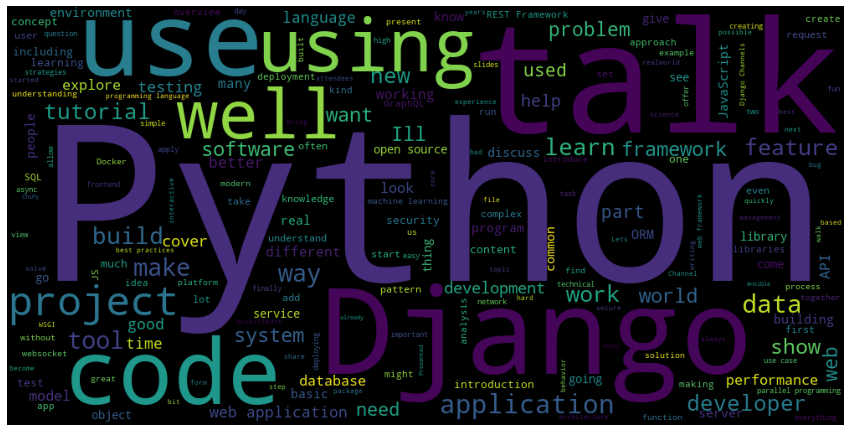

In [56]:
my_list = []
end_word = [""]

for i in list(json_df['description']):
    for j in i.split():
        if j not in stopwords.words('english'):  # remove stopwords
            my_list.append(j)

# to delete special charecters
my_list = [re.sub('[^a-zA-Z0-9]+', '', _) for _ in my_list]

# create word cloud
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()